EXPLORATORY DATA ANALYSIS ON A DATASET

Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the
"cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's
underlying structure. You will use statistical summaries, visualizations, and data manipulation 
techniques to explore the dataset comprehensively


Dataset:
1.LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.FM - May indicate "Fetal Movements" detected by the monitor.
4.UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.DS - May represent "Decelerations Short" or decelerations of brief duration.
7.DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.




Tasks:

1.	Data Cleaning and Preparation:
●	Load the dataset into a DataFrame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.


In [8]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("Cardiotocographic.csv.xlsx")

# Preview the data
df.head()

# Check for missing values
df.isnull().sum()

# Convert data types if needed
df.dtypes

# Handle missing values (example: fill with median)
df.fillna(df.median(), inplace=True)

# Detect outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

2.	Statistical Summary:
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
●	Highlight any interesting findings from this summary.


In [5]:
# Summary statistics
summary = df.describe().T

# Add median and IQR
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567,0.001634,0.005606
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.000000,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004484,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.000000,0.003289
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


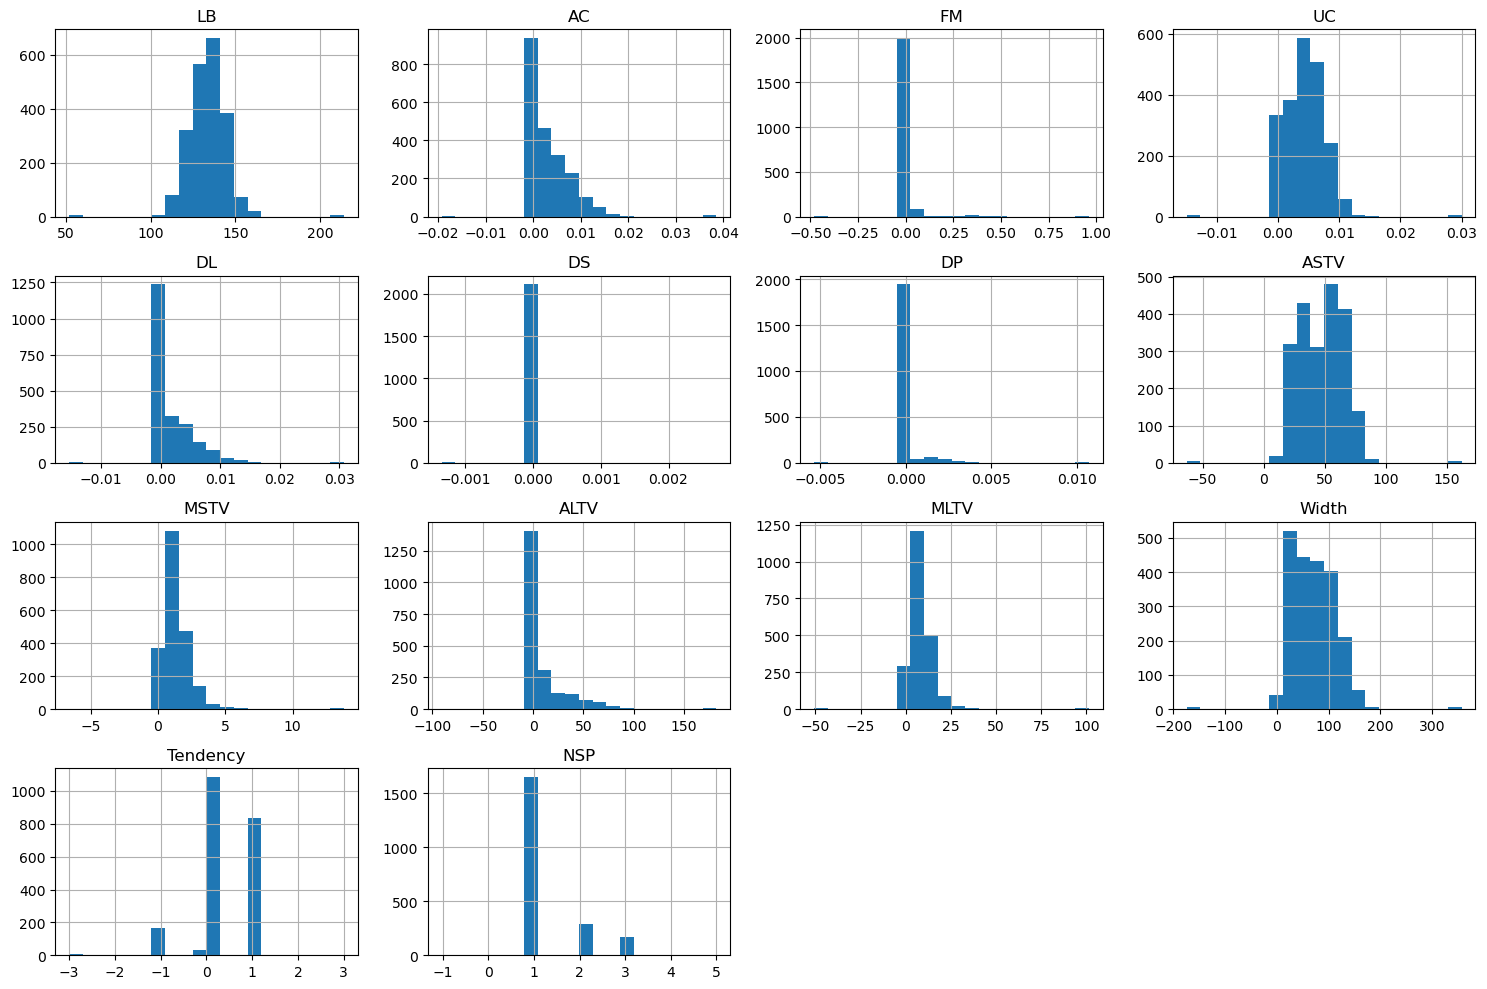

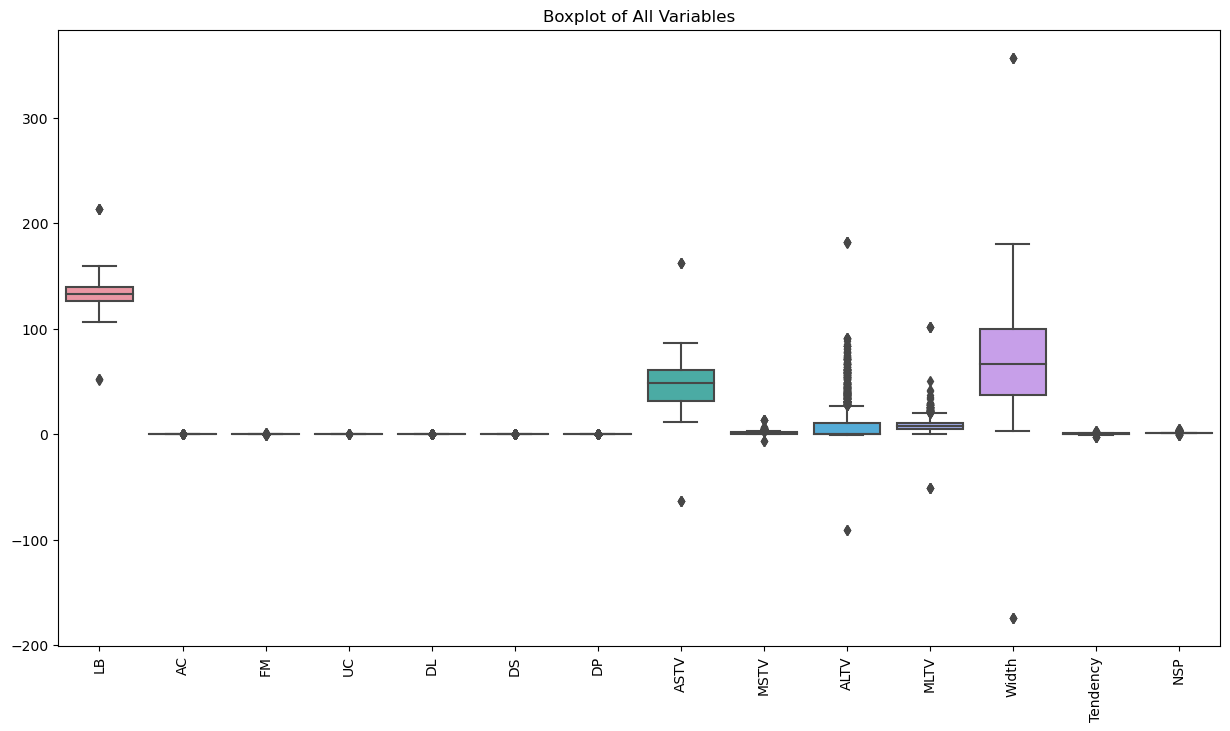

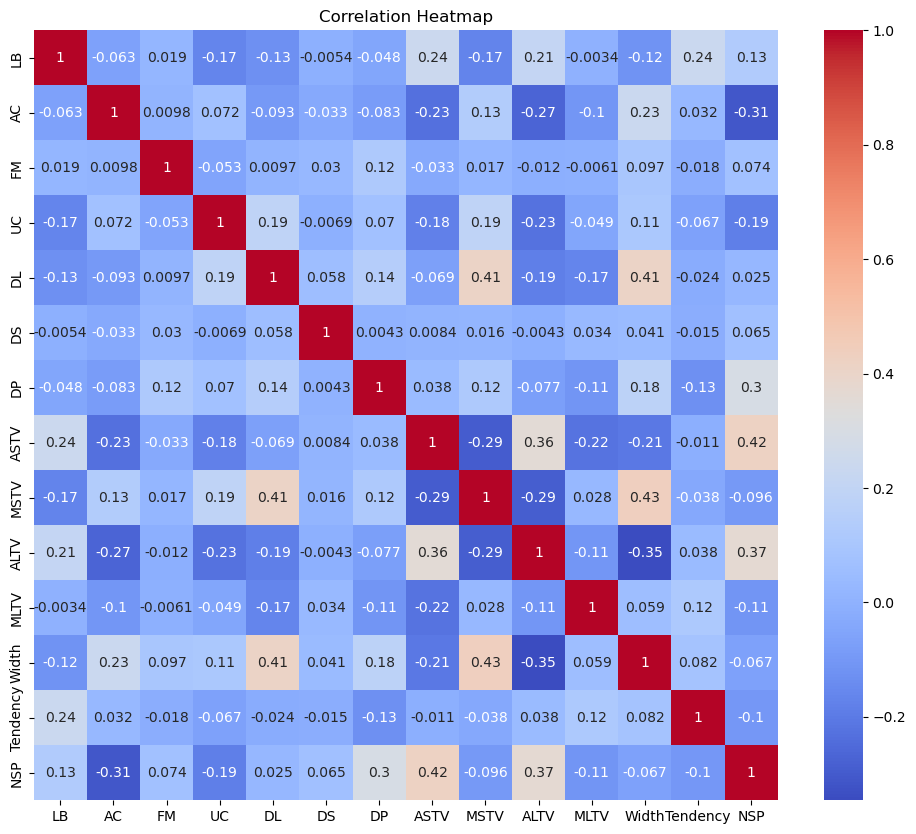

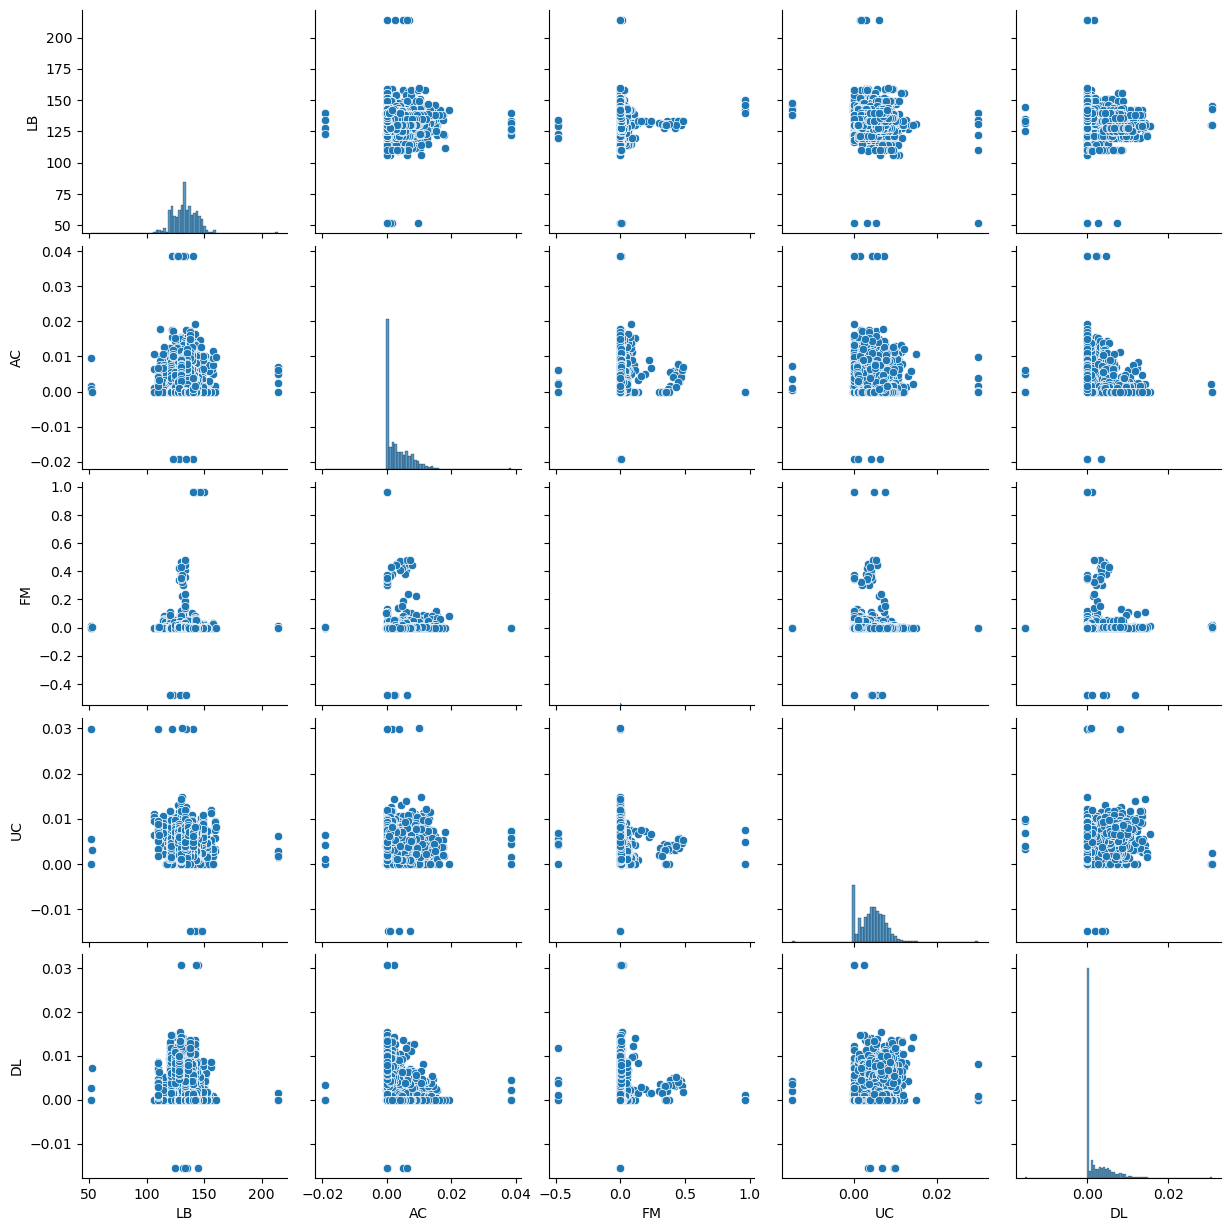

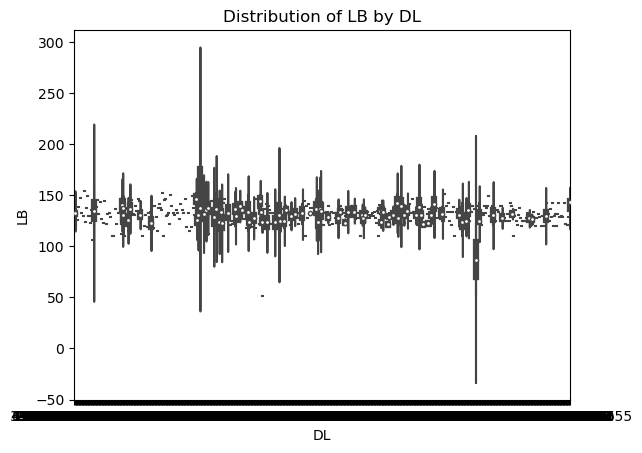

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of All Variables")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pair plot (for selected variables)
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL']
sns.pairplot(df[selected_cols])
plt.show()

# Violin plot example
sns.violinplot(x='DL', y='LB', data=df)
plt.title("Distribution of LB by DL")
plt.show()

4. Pattern Recognition and Insights
- Correlations:
Strong positive correlation between AC and FM may suggest fetal movement triggers accelerations.
Negative correlation between DL and LB could indicate distress during late decelerations.
- Trends:
If there's a timestamp or sequence column, use .groupby() or .rolling() to analyze trends over time.


5. Conclusion
- Key Insights:
Variables like ASTV, ALTV, and DL show signs of abnormality and may be critical for fetal health monitoring.
Correlations between FM, AC, and UC suggest physiological interdependence.
Outlier detection helped clean noisy data, improving reliability.
- Recommendations:
Consider clustering or classification models to predict fetal health status.
Further analysis could include comparing normal vs. abnormal cases if labels are available.
